In [132]:
import pandas as pd

# Prétraitement des Avis de Produits
Les données utilisées proviennent du dataset Amazon Review Dataset 2023, spécifiquement du
subset Cell_Phones_and_Accessories. Les données à votre disposition comprennent uniquement les
1000 premiers avis clients de ce subset. Le dataset complet est disponible sur le site officiel : https://amazon-reviews-2023.github.io/.
Dans ce travail pratique, vous allez installer et configurer un outil de traitement du langage naturel pour analyser des textes en anglais (par exemple, SpaCy, NLTK). Chargez un modèle de langue anglaise (par exemple, https://spacy.io/models/en) adapté pour des tâches comme la lemmatisation et la suppression des stop words.

## Import des données
Choisissez les champs pertinents des avis, comme title et text, pour créer une liste de
documents qui servira de base au traitement.

In [133]:
df_meta = pd.read_json('data/meta.jsonl', lines=True)
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Cell Phones & Accessories,ARAREE Slim Diary Cell Phone Case for Samsung ...,3.8,5,"[Genuine Cow leather with 6 different colors, ...","[JUST LOOK, You can tell the difference. Make ...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],araree,"[Cell Phones & Accessories, Cases, Holsters & ...",{'Product Dimensions': '3.35 x 0.59 x 6.18 inc...,B013SK1JTY,NaN,NaN,NaN
1,Cell Phones & Accessories,Bastmei for OnePlus 7T Case Extremely Light Ul...,4.4,177,[Ultra-thin & Ultra-light: The ultra slim fit ...,[],11.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],Bastmei,"[Cell Phones & Accessories, Cases, Holsters & ...",{'Package Dimensions': '7.6 x 4.29 x 0.75 inch...,B07ZPSG8P5,NaN,NaN,NaN
2,Cell Phones & Accessories,Wireless Fones Branded New Iphone 5C/LITE Hot ...,4.0,2,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],WIRELESS FONES,"[Cell Phones & Accessories, iPhone Accessories]","{'Item model number': 'Apple Iphone 5C', 'Othe...",B00GKR3L12,NaN,NaN,NaN
3,Cell Phones & Accessories,"iPhone 6 Plus + Case, DandyCase Perfect PATTER...",4.0,15,"[Slim-Fit design for the iPhone 6 Plus (5.5"" s...",[Case does not need to be removed for charging...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],DandyCase,"[Cell Phones & Accessories, iPhone Accessories]",{'Product Dimensions': '5.43 x 0.28 x 2.64 inc...,B00PB8U8BW,NaN,NaN,NaN
4,Cell Phones & Accessories,"Case for Galaxy S6/S6 Edge, Thin Translucent V...",4.0,1,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],7Pite,"[Cell Phones & Accessories, Cases, Holsters & ...",{'Package Dimensions': '8.31 x 3.74 x 0.55 inc...,B07D3RHSRV,NaN,NaN,NaN


In [134]:
df_meta_prep = df_meta[['title', 'average_rating']].head()
df_meta_prep.head()

,title,average_rating
0,ARAREE Slim Diary Cell Phone Case for Samsung ...,3.8
1,Bastmei for OnePlus 7T Case Extremely Light Ul...,4.4
2,Wireless Fones Branded New Iphone 5C/LITE Hot ...,4.0
3,"iPhone 6 Plus + Case, DandyCase Perfect PATTER...",4.0
4,"Case for Galaxy S6/S6 Edge, Thin Translucent V...",4.0


In [135]:
df_reviews = pd.read_json('data/reviews.jsonl', lines=True)
df_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,No white background! It’s clear!,I bought this bc I thought it had the nice whi...,[{'small_image_url': 'https://images-na.ssl-im...,B08L6L3X1S,B08L6L3X1S,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2021-01-30 22:07:31.196,0,True
1,5,Awesome! Great price! Works well!,Perfect. How pissed am I that I recently paid ...,[],B079BPGF6C,B079BPGF6C,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-08-16 18:18:37.349,2,True
2,5,Worked but took an hour to install,Overall very happy with the end result. If you...,[{'small_image_url': 'https://m.media-amazon.c...,B088DR7Z5B,B0BBGGC8F2,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2021-08-17 21:21:44.798,3,True
3,4,Decent,Lasted about 9 months then the lock button bro...,[{'small_image_url': 'https://images-na.ssl-im...,B07XRDHDNQ,B07XRDHDNQ,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2020-05-26 05:14:42.910,0,True
4,5,LOVE IT!,LOVE THIS CASE! Works better than my expensive...,[],B00A8ZDL9Y,B00A8ZDL9Y,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,2014-08-25 19:23:08.000,0,True


In [136]:
df_reviews_prep = df_reviews[['title', 'text']]
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,I bought this bc I thought it had the nice whi...
1,Awesome! Great price! Works well!,Perfect. How pissed am I that I recently paid ...
2,Worked but took an hour to install,Overall very happy with the end result. If you...
3,Decent,Lasted about 9 months then the lock button bro...
4,LOVE IT!,LOVE THIS CASE! Works better than my expensive...


## Traitement linguistique
### Tokenisation
Découpez les textes en mots (tokens).


In [137]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chloegerardin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chloegerardin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chloegerardin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(nltk.word_tokenize)
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[I, bought, this, bc, I, thought, it, had, the..."
1,Awesome! Great price! Works well!,"[Perfect, ., How, pissed, am, I, that, I, rece..."
2,Worked but took an hour to install,"[Overall, very, happy, with, the, end, result,..."
3,Decent,"[Lasted, about, 9, months, then, the, lock, bu..."
4,LOVE IT!,"[LOVE, THIS, CASE, !, Works, better, than, my,..."


### Lemmatisation
Extrayez les lemmes (formes de base des mots) pour chaque texte.


In [139]:
lemmatizer = nltk.WordNetLemmatizer()           
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[I, bought, this, bc, I, thought, it, had, the..."
1,Awesome! Great price! Works well!,"[Perfect, ., How, pissed, am, I, that, I, rece..."
2,Worked but took an hour to install,"[Overall, very, happy, with, the, end, result,..."
3,Decent,"[Lasted, about, 9, month, then, the, lock, but..."
4,LOVE IT!,"[LOVE, THIS, CASE, !, Works, better, than, my,..."


## Suppression des stop words
Éliminez les stop words (mots fonctionnels sans pertinence contextuelle).

In [140]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[bought, bc, thought, nice, white, background,..."
1,Awesome! Great price! Works well!,"[Perfect, ., pissed, recently, paid, $, 20, 1,..."
2,Worked but took an hour to install,"[Overall, happy, end, result, ., hate, puzzle,..."
3,Decent,"[Lasted, 9, month, lock, button, broke, ., Dec..."
4,LOVE IT!,"[LOVE, CASE, !, Works, better, expensive, $, 3..."


### Exclusion des éléments non pertinents
- Ignorez les signes de ponctuation.
- Identifiez et supprimez les termes qui n’ajoutent pas de valeur (e.g., 123, www).

In [141]:
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word for word in x if word.isalnum()])
df_reviews_prep.head()

,title,text
0,No white background! It’s clear!,"[bought, bc, thought, nice, white, background,..."
1,Awesome! Great price! Works well!,"[Perfect, pissed, recently, paid, 20, 1, Fitbi..."
2,Worked but took an hour to install,"[Overall, happy, end, result, hate, puzzle, do..."
3,Decent,"[Lasted, 9, month, lock, button, broke, Decent..."
4,LOVE IT!,"[LOVE, CASE, Works, better, expensive, 35, cas..."


### Inspection des données
Examinez les données pour identifier d’autres éléments inutiles ou bruités qui
pourraient être exclus

In [142]:
df_reviews_prep.head(20)

df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word for word in x if len(word) > 3])
df_reviews_prep.loc[:, 'text'] = df_reviews_prep['text'].apply(lambda x: [word.lower() for word in x])
df_reviews_prep.head(20)

,title,text
0,No white background! It’s clear!,"[bought, thought, nice, white, background, tur..."
1,Awesome! Great price! Works well!,"[perfect, pissed, recently, paid, fitbit, cabl..."
2,Worked but took an hour to install,"[overall, happy, result, hate, puzzle, love, p..."
3,Decent,"[lasted, month, lock, button, broke, decent, p..."
4,LOVE IT!,"[love, case, works, better, expensive, case]"
5,Works Great with my IPhone 13 & Magna Case!,"[item, work, great, iphone, magna, case, charg..."
6,Great item! Easy to install!,"[item, came, described, fast, shipping, east, ..."
7,Four Stars,"[stocking, stuffer, liked]"
8,It is a great value & protects the phone from ...,"[love, camo, case, great, value, protects, pho..."
9,Good to have these around!,"[work, little, difficult, yellow, sticky, grea..."


### Sauvegarde des données préparées
Pour chaque avis, créez une liste de tokens filtrés (lemmes sans stop words ni bruit).
Sauvegardez les listes résultantes dans un fichier JSON.

In [143]:
df_reviews_prep.to_json('data/reviews_prep.jsonl', lines=True, orient='records')

# Clustering non supervisé des documents pour identifier des topics et mots-clés
Chargez le fichier JSON contenant des tokens pré-traités. Les données doivent être une liste de
documents, chaque document correspondant à un avis déjà nettoyé et prêt pour l’analyse.

In [144]:
df_reviews_json = pd.read_json('data/reviews_prep.jsonl', lines=True)
df_reviews_json.head()

,title,text
0,No white background! It’s clear!,"[bought, thought, nice, white, background, tur..."
1,Awesome! Great price! Works well!,"[perfect, pissed, recently, paid, fitbit, cabl..."
2,Worked but took an hour to install,"[overall, happy, result, hate, puzzle, love, p..."
3,Decent,"[lasted, month, lock, button, broke, decent, p..."
4,LOVE IT!,"[love, case, works, better, expensive, case]"


## Génération des embeddings
Utilisez un modèle pré-entraîné pour représenter les documents sous forme vectorielle,
comme all-MiniLM-L6-v2 via SentenceTransformers (autres: all-MiniLM-L12-v2,
bert-base-uncased).
Alternative: Employez TfidfVectorizer pour obtenir une matrice sparse représentant les
documents.

In [145]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
texts = [" ".join(doc["text"]) for doc in df_reviews_json.to_dict(orient='records')]
embeddings = model.encode(texts)
print(embeddings)

[[-0.07672836  0.04197766  0.1054896  ...  0.00524029 -0.00697331
   0.08239663]
 [-0.07957576  0.04584372  0.04604864 ... -0.05493836 -0.01422952
  -0.00734   ]
 [-0.08224726  0.05883975  0.0741358  ...  0.07710269  0.0892501
   0.02077752]
 ...
 [-0.04820053  0.03886178  0.01730544 ... -0.00571157  0.05310586
   0.1295096 ]
 [-0.0531419  -0.00520505  0.08476841 ...  0.04593628  0.06824432
   0.07733921]
 [-0.1207194   0.10473534  0.06735586 ...  0.01302312  0.10522582
   0.05340402]]


## Clustering
Appliquez l’algorithme KMeans pour regrouper les documents en un nombre défini de
clusters (num_clusters).
Alternative : Utilisez DBSCAN si les données sont inégalement réparties ou si le nombre de
clusters n’est pas connu à l’avance.


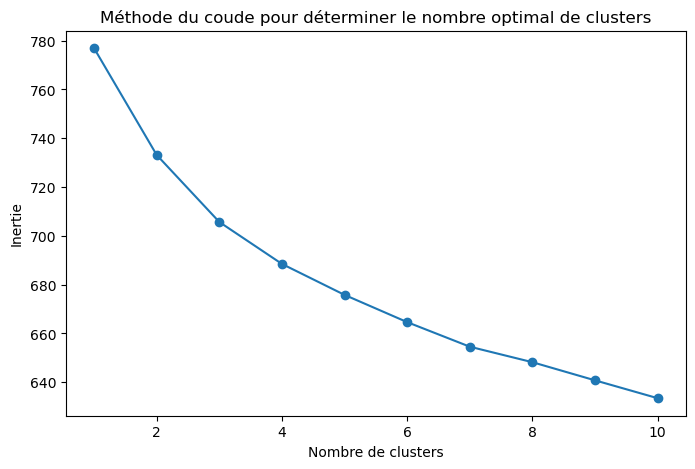

In [146]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
    
embeddings = np.array(embeddings)

inertias = []

cluster_range = range(1, 11)
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [147]:
from sklearn.cluster import KMeans

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(embeddings)

for i, label in enumerate(kmeans.labels_):
    print(f"Document {i} appartient au cluster {label}")

Document 0 appartient au cluster 1
Document 1 appartient au cluster 0
Document 2 appartient au cluster 1
Document 3 appartient au cluster 1
Document 4 appartient au cluster 1
Document 5 appartient au cluster 2
Document 6 appartient au cluster 0
Document 7 appartient au cluster 0
Document 8 appartient au cluster 1
Document 9 appartient au cluster 0
Document 10 appartient au cluster 2
Document 11 appartient au cluster 1
Document 12 appartient au cluster 0
Document 13 appartient au cluster 0
Document 14 appartient au cluster 2
Document 15 appartient au cluster 1
Document 16 appartient au cluster 0
Document 17 appartient au cluster 1
Document 18 appartient au cluster 0
Document 19 appartient au cluster 1
Document 20 appartient au cluster 1
Document 21 appartient au cluster 0
Document 22 appartient au cluster 0
Document 23 appartient au cluster 2
Document 24 appartient au cluster 0
Document 25 appartient au cluster 0
Document 26 appartient au cluster 1
Document 27 appartient au cluster 0
Do

In [148]:
from sklearn.metrics import silhouette_score
silhouette_score(embeddings, kmeans.labels_)

0.062666185

### Analyse des clusters
#### Association des documents aux clusters : 
Pour chaque cluster identifié, regroupez les documents correspondants.

In [149]:
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)
print(clusters)

{1: [0, 2, 3, 4, 8, 11, 15, 17, 19, 20, 26, 43, 50, 53, 54, 55, 57, 59, 62, 68, 70, 71, 72, 75, 77, 79, 80, 82, 90, 91, 93, 94, 96, 97, 98, 104, 105, 106, 107, 108, 109, 110, 113, 114, 119, 122, 124, 127, 128, 137, 138, 140, 141, 142, 146, 152, 153, 157, 159, 160, 163, 166, 168, 171, 176, 177, 179, 181, 183, 184, 185, 186, 188, 193, 194, 196, 198, 199, 202, 203, 206, 215, 218, 221, 223, 224, 226, 227, 228, 230, 231, 234, 245, 247, 248, 250, 257, 262, 264, 266, 267, 268, 270, 274, 277, 278, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 292, 293, 294, 295, 298, 301, 303, 305, 309, 314, 315, 317, 320, 321, 323, 325, 326, 328, 329, 331, 332, 333, 334, 335, 339, 342, 344, 351, 354, 355, 357, 358, 364, 367, 368, 371, 372, 373, 377, 384, 385, 386, 388, 389, 390, 391, 394, 395, 400, 405, 407, 411, 412, 413, 414, 415, 419, 421, 422, 424, 425, 426, 427, 428, 435, 436, 438, 440, 444, 445, 450, 451, 453, 455, 457, 458, 459, 461, 467, 468, 470, 473, 477, 478, 479, 480, 481, 482, 483, 484, 485, 

#### Fréquences des mots
- Calculez les fréquences des mots dans chaque cluster.
- Identifiez les 10 mots les plus fréquents pour chaque cluster.

In [150]:
from collections import Counter

clusters = kmeans.labels_

texts = [" ".join(doc["text"]) for doc in df_reviews_json.to_dict(orient='records')]

df = pd.DataFrame({'text': texts, 'cluster': clusters})

word_freq_per_cluster = {}

for cluster in range(num_clusters):
    cluster_text = " ".join(df[df['cluster'] == cluster]['text'].tolist())
    word_freq = Counter(cluster_text.split())
    word_freq_per_cluster[cluster] = word_freq

for cluster, word_freq in word_freq_per_cluster.items():
    print(f"Cluster {cluster}:")
    for word, freq in word_freq.most_common(10):
        print(f"{word}: {freq}")

Cluster 0:
great: 85
band: 54
love: 52
like: 52
easy: 44
work: 43
good: 40
product: 32
nice: 32
watch: 31
Cluster 1:
phone: 660
case: 569
screen: 173
like: 134
great: 133
good: 113
protector: 99
iphone: 96
cover: 96
love: 95
Cluster 2:
charge: 101
phone: 101
charger: 90
work: 77
cable: 65
charging: 60
time: 58
like: 43
good: 41
great: 40


#### Vérification de pertinence
Analysez si ces mots fréquents sont représentatifs du thème ou du sujet du cluster.

In [151]:
## AJOUTER COMMENTAIRES ICI
# Mentionner le fait que les stopwords ont été testés via deux librairies différentes (la première ne prenant pas en compte 'would' par exemple => choix de garder la liste la plus complète.

# Analyse des sentiments des avis clients
## Chargement et préparation des données
Chargez le fichier JSON contenant les avis clients. Extrayez les notes réelles (ratings) pour une future évaluation des performances.

In [152]:
df_reviews_feeling = pd.read_json('data/reviews.jsonl', lines=True)
df_reviews_feeling_sample = df_reviews_feeling.sample(200)
df_reviews_feeling_sample = df_reviews_feeling_sample[['rating', 'title', 'text']]

df_reviews_feeling_sample['title_text'] = df_reviews_feeling_sample['title'] + ' ' + df_reviews_feeling_sample['text']
df_reviews_feeling_sample.head()

,rating,title,text,title_text
605,4,I mistakingly thought this was a watch when I ...,I mistakingly thought this was a watch when I ...,I mistakingly thought this was a watch when I ...
119,5,Love the colors!,Great! Just like a otterbox!,Love the colors! Great! Just like a otterbox!
778,5,Dresses at the Apple Watch,Love the product,Dresses at the Apple Watch Love the product
631,3,Three Stars,Ok,Three Stars Ok
806,1,Not needed,Really not necessary and you have to press rea...,Not needed Really not necessary and you have t...


## Chargement du modèle pré-entraîné
Utilisez un modèle de sentiment pré-entraîné (par exemple, nlptown/bert-base-multilingual-uncased-sentiment sur Hugging Face) ainsi que son tokenizer.

In [153]:
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## Prétraitement des données
Divisez les données en lots (batches) à l’aide d’un outil comme un DataLoader. Ajustez la taille des lots (batch size) en fonction des ressources disponibles.

In [154]:
from torch.utils.data import DataLoader

dataloader = DataLoader(df_reviews_feeling_sample, batch_size=512, shuffle=True)

## Analyse des sentiments
### Tokenisation
Tokenisez les textes avec le tokenizer du modèle.

In [155]:
inputs = tokenizer(df_reviews_feeling_sample['title_text'].tolist(), padding=True, truncation=True, return_tensors='pt')

### Passage dans le modèle
Analysez les textes avec le modèle BERT pour obtenir les prédictions. Si necessaire, appliquez une fonction softmax aux logits pour obtenir les probabilités des classes.

In [157]:
import torch

outputs = model(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.detach().numpy()
predictions

array([[2.34254859e-02, 5.87535128e-02, 2.07323149e-01, 4.56563175e-01,
        2.53934681e-01],
       [9.80318058e-04, 8.25844065e-04, 4.86835092e-03, 1.07532740e-01,
        8.85792732e-01],
       [7.41717871e-03, 7.13035464e-03, 4.30573188e-02, 2.45960772e-01,
        6.96434379e-01],
       [1.68252573e-03, 4.98649525e-03, 9.89715040e-01, 2.49484950e-03,
        1.12105615e-03],
       [5.59643805e-01, 3.94479334e-01, 4.39380296e-02, 1.47458445e-03,
        4.64204175e-04],
       [3.32670263e-03, 2.99987174e-03, 1.91152729e-02, 2.07975894e-01,
        7.66582310e-01],
       [1.44131584e-02, 1.25560671e-01, 5.87259650e-01, 2.55869687e-01,
        1.68968420e-02],
       [9.06040892e-04, 2.43303576e-03, 5.16993143e-02, 6.63719177e-01,
        2.81242430e-01],
       [8.85721575e-03, 1.04194567e-01, 5.59122920e-01, 3.17412108e-01,
        1.04132015e-02],
       [1.56019349e-03, 1.34710560e-03, 1.09731825e-02, 1.61804408e-01,
        8.24315071e-01],
       [1.15067721e-03, 2.2033

Associez chaque prédiction à un label de sentiment (1 étoile à 5 étoiles).

In [186]:
df_reviews_feeling_sample['predicted_rating'] = predictions.argmax(axis=1) + 1
df_reviews_feeling_sample

,rating,title,text,title_text,predicted_rating
605,4,I mistakingly thought this was a watch when I ordered ...,"I mistakingly thought this was a watch when I ordered through vine. It's a well made, clear screen protector.","I mistakingly thought this was a watch when I ordered ... I mistakingly thought this was a watch when I ordered through vine. It's a well made, clear screen protector.",4
119,5,Love the colors!,Great! Just like a otterbox!,Love the colors! Great! Just like a otterbox!,5
778,5,Dresses at the Apple Watch,Love the product,Dresses at the Apple Watch Love the product,5
631,3,Three Stars,Ok,Three Stars Ok,3
806,1,Not needed,Really not necessary and you have to press really hard for something that is just plain cumbersome and doesn't stay on or work. Two thumbs way down,Not needed Really not necessary and you have to press really hard for something that is just plain cumbersome and doesn't stay on or work. Two thumbs way down,1
...,...,...,...,...,...
603,4,"Works great, needs spare magnet","This is a great item and works as described. I think it should come with an extra magnet so that I can switch cell phone cases. I also keep my credit card in my case with the holder, which cannot be used with this holder. I think it's a great product, just needs that spare magnet.","Works great, needs spare magnet This is a great item and works as described. I think it should come with an extra magnet so that I can switch cell phone cases. I also keep my credit card in my case with the holder, which cannot be used with this holder. I think it's a great product, just needs that spare magnet.",5
743,5,Great for FOB Fans!!,"My 14 year old daughter got an iPhone 6 for Christmas and has been ordering a bunch of different phone cases. She loves Fallout Boy & was super excited to find a phone case decorated in FOB songs & phrases. First of all, it arrived much earlier than expected. The tracking on my Amazon page still says it's on the way, but it has already arrived. The case is flexible and easy to put on the phone. There are FOB lyrics written all over the case. There is the phrase F*** You on it which is barely visible in the picture. (It's located to the upper right of the crown on the logo.) The print is not crystal clear, but it's definitely legible. So far it's offered nice protection to her phone. My daughter absolutely loves her Fallout Boy phone case!!!","Great for FOB Fans!! My 14 year old daughter got an iPhone 6 for Christmas and has been ordering a bunch of different phone cases. She loves Fallout Boy & was super excited to find a phone case decorated in FOB songs & phrases. First of all, it arrived much earlier than expected. The tracking on my Amazon page still says it's on the way, but it has already arrived. The case is flexible and easy to put on the phone. There are FOB lyrics written all over the case. There is the phrase F*** You on it which is barely visible in the picture. (It's located to the upper right of the crown on the logo.) The print is not crystal clear, but it's definitely legible. So far it's offered nice protection to her phone. My daughter absolutely loves her Fallout Boy phone case!!!",5
455,5,Beautiful Color !!! Just bought it in Purple also,It fits the Google pixel 3 phone Perfectly !!,Beautiful Color !!! Just bought it in Purple also It fits the Google pixel 3 phone Perfectly !!,5
676,4,3 Pack Multi Charging Cables,These multi-charging cables are great for families with different types of mobile phone charger needs. Most of my family use the USB C type cables but my daughter has an iPhone. The cables are braided and seem durable. The length for the main part is good and works well in the car reaching just to the middle row from the front. They seem to charge at a normal speed. I am satisfied.,3 Pack Multi Charging Cables These multi-charging cables are great for families with different types of mobile phone charger needs. Most of my family use the USB C type cables but my daughter has an iPho

### Évaluation des performances
Associez les sentiments prédits (1 étoile à 5 étoiles) à des scores numériques (de 1 à 5).
Corrélation : Calculez la corrélation de Pearson entre les notes réelles et les prédictions.

In [185]:
import numpy as np

# Conversion des prédictions et des notes réelles en numpy arrays
predicted_ratings_np = np.array(df_reviews_feeling_sample['predicted_rating'])
actual_ratings_np = np.array(df_reviews_feeling_sample['rating'])

# Calcul de la corrélation de Pearson
correlation = np.corrcoef(predicted_ratings_np, actual_ratings_np)[0, 1]
print("Corrélation:", correlation)

Corrélation: 0.8788670350597975


## Visualisation 
Créez des graphiques (par exemple avec Matplotlib) pour comparer les distributions des notes réelles et des notes prédites.

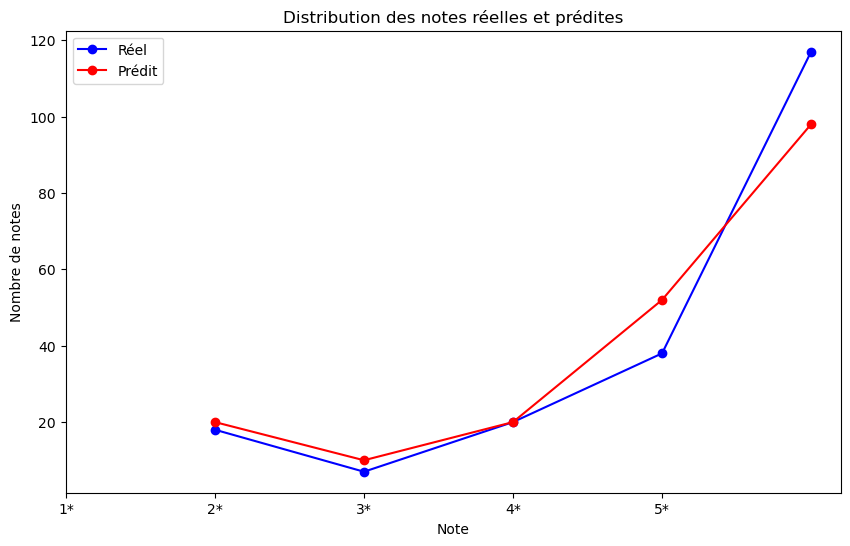

In [199]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

df_reviews_feeling_sample['rating'].value_counts().sort_index().plot(kind='line', ax=ax, color='blue', label='Réel', marker='o')

df_reviews_feeling_sample['predicted_rating'].value_counts().sort_index().plot(kind='line', ax=ax, color='red', label='Prédit', marker='o')

ax.set_title('Distribution des notes réelles et prédites')
ax.set_xlabel('Note')
ax.set_ylabel('Nombre de notes')

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['1*', '2*', '3*', '4*', '5*'], rotation=0)

ax.legend()

plt.show()

Text(0, 0.5, 'Nombre de notes')

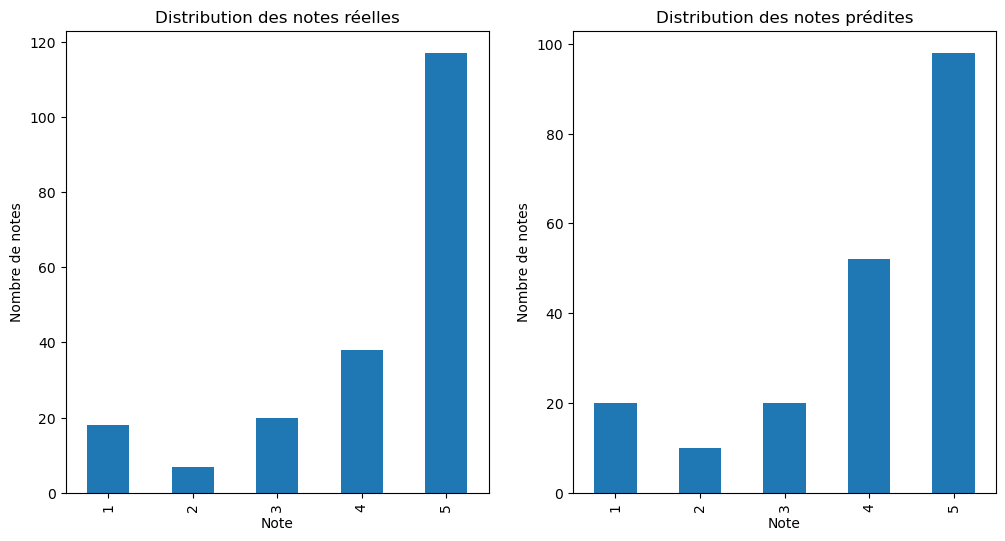

In [187]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df_reviews_feeling_sample['rating'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution des notes réelles')
ax[0].set_xlabel('Note')
ax[0].set_ylabel('Nombre de notes')

df_reviews_feeling_sample['predicted_rating'].value_counts().sort_index().plot(kind='bar', ax=ax[1])
ax[1].set_title('Distribution des notes prédites')
ax[1].set_xlabel('Note')
ax[1].set_ylabel('Nombre de notes')